# Exercise 2 – Simple Pattern Classification

Goal: Use a small MLP to solve a non-linear problem.

Generate 2D points in the plane (x,y).

Label them as class 1 if inside a circle of radius 1, and class 0 otherwise.

Train an MLP with one hidden layer to classify the points correctly.

Compare results with a single perceptron and discuss.

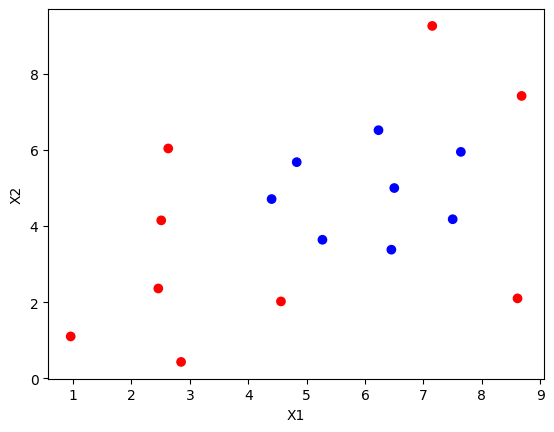

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([
    [6.5, 5.00],
    [2.46, 2.36],
    [2.63, 6.04],
    [4.56, 2.02],
    [5.27, 3.64],
    [4.83, 5.68],
    [6.23, 6.52],
    [7.50, 4.18],
    [8.68, 7.42],
    [7.15, 9.26],
    [8.61, 2.10],
    [2.85, 0.43],
    [0.96, 1.10],
    [2.51, 4.15],
    [6.45, 3.38],
    [4.40, 4.71],
    [7.64, 5.95]
    ])

y = np.array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

colors = ['blue' if label == 1 else 'red' for label in y]

plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

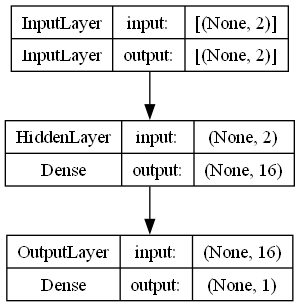

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = layers.Input(shape=(2,), name="InputLayer")
hidden = layers.Dense(16, activation="relu", name="HiddenLayer")(inputs)
outputs = layers.Dense(1, activation="sigmoid", name="OutputLayer")(hidden)

model = keras.Model(inputs=inputs, outputs=outputs, name="CircleNetwork")

keras.utils.plot_model(model, "CircleNetwork.png", show_shapes=True)

In [32]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate= 0.1)
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x, y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 0.4307 - accuracy: 0.8235
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 1.1151 - accuracy: 0.5294
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 1.0089 - accuracy: 0.6471
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 1.2849 - accuracy: 0.5294
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.8273 - accuracy: 0.7059
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.7647
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7006 - accuracy: 0.6471
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.8078 - accuracy: 0.5882
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.8235
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4188 - accuracy: 0.8235
Epoch 11/50
1/1 [====================

In [33]:
xPredict = np.array([
    [2.42, 1.70],
    [7.43, 9.64],
    [10.32, 6.00],
    [6.81, 3.73]
])
yPredict = model.predict(xPredict)
print("yPredict probabilite: ")
print(yPredict)
print("yPredict Classifier")
print(np.round(yPredict))

1/1 [==============================] - 0s 32ms/step
yPredict probabilite: 
[[0.05235706]
 [0.2338118 ]
 [0.98528445]
 [0.9425772 ]]
yPredict Classifier
[[0.]
 [0.]
 [1.]
 [1.]]
